<a href="https://colab.research.google.com/github/Maagnitude/california-housing-xai/blob/main/california-housing-xai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Βιβλιοθήκες**
Κάνουμε **import** τα απαραίτητα **modules**:

* Το **matplotlib.pyplot** για τη δημιουργία διαγραμμάτων.
* Το **numpy** για την υποστήριξη μαθηματικών πράξεων και σχέσεων.
* Το **datasets** για να εισάγουμε το **dataset** πάνω στο οποίο θέλουμε να εκπαιδεύσουμε το μοντέλο μας, και το **linear_model** για να χρησιμοποιήσουμε ένα γραμμικό μοντέλο (συγκεκριμένα της **γραμμικής παλινδρόμισης**)
* Από το **datasets** εισάγουμε το **fetch_california_housing**, ώστε να πάρουμε το εν λόγω **dataset**.
* Από τα **metrics** εισάγουμε:
  * το **mean_squared_error**, για να υπολογίσουμε το **μέσο τετραγωνικό σφάλμα** της πρόβλεψης του μοντέλου μας, και
  * το **r2_score** για να υπολογίσουμε την μετρική **R-squared** του μοντέλου μας.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets, linear_model
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [11]:
# Φορτώνουμε το σύνολο δεδομένων (X:είσοδοι/χαρακτηριστικά, Y:στόχος/label)
ds_X, ds_Y = fetch_california_housing(return_X_y=True)
data = fetch_california_housing(as_frame=True)

# Χωρίζουμε το σύνολο δεδομένων εισόδου σε train και test set
ds_X_train = ds_X[:-4000]
ds_X_test = ds_X[-4000:]

# Χωρίζουμε τα labels σε train και test set
ds_Y_train = ds_Y[:-4000]
ds_Y_test = ds_Y[-4000:]

# Δημιουργούμε ένα αντικείμενο μοντέλου γραμμικής παλινδρόμησης
regr = linear_model.LinearRegression()

In [12]:
# Construct model using the training sets
regr.fit(ds_X_train, ds_Y_train)
# Produce predictions using the test set
ds_Y_pred = regr.predict(ds_X_test)

## **Βάρη/Συντελεστές**
Παίρνουμε τα **βάρη/συντελεστές** (**coefficients/β1-β8**), την **παρεμβολή** (**intercept/β0**) καθώς και το **σφάλμα πρόβλεψης** (**prediction_error/ε**) και παρατηρούμε ότι η πρόβλεψη **y** κάθε δείγματος θα υπολογίζεται από την σχέση:

**y = β0 + β1X1 + β2X2 + β3X3 + β4X4 + β5X5 + β6X6 + β7X7 + β8X8 + ε**

η οποία αντικαθιστώντας τις τιμές γίνεται:

**y = -36.308638344599295 + 4.47711234e-01 x X1 + 9.40915756e-03 x X2 - 1.20802393e-01 x X3 + 7.09551707e-01 x X4 - 1.82577993e-06 x X5 - 8.83342492e-03 x X6 - 4.21683195e-01 x X7 - 4.29077083e-01 x X8 + 0.50**

Οπότε τα χαρακτηριστικά **X1** και **X4** τα οποία πολλαπλασιάζονται με τα βάρη **β1** και **β4** αντίστοιχα, έχουν **μεγάλη θετική συσχέτιση** με την **τιμή αγοράς κατοικίας** και τα **X7**, **Χ8** (με **β7** και **β8**) έχουν **μεγάλη αρνητική συσχέτιση** μ' αυτήν.

In [4]:
# Output learned model coefficients
intercept = regr.intercept_
coefficients = regr.coef_
print("Intercept: \n", intercept,"\n")
print("Coefficients: \n", coefficients)

Intercept: 
 -36.308638344599295 

Coefficients: 
 [ 4.47711234e-01  9.40915756e-03 -1.20802393e-01  7.09551707e-01
 -1.82577993e-06 -8.83342492e-03 -4.21683195e-01 -4.29077083e-01]


In [8]:
# Output mean squared prediction error
prediction_error = mean_squared_error(ds_Y_test, ds_Y_pred)
print("Mean square prediction error: %.2f" % prediction_error)

Mean square prediction error: 0.50


In [5]:
cal_housing=fetch_california_housing()
feature_names=cal_housing.feature_names
target = cal_housing.target
data = cal_housing.data

In [6]:
feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

## **Οπτικοποίηση των βαρών**

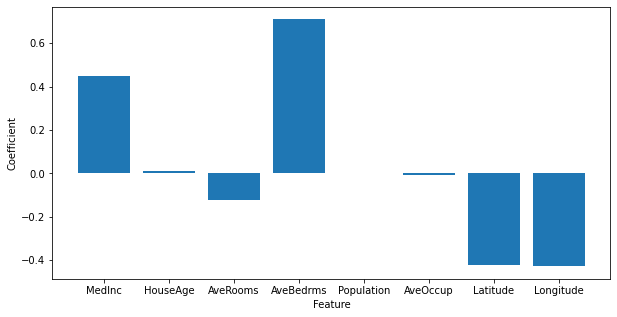

In [7]:
plt.figure(figsize=(10,5))
plt.bar(feature_names, coefficients)

plt.xlabel('Feature')
plt.ylabel('Coefficient')

plt.show()

# **Μετρική R-squared**
Η μετρική R-squared είναι ένα μέτρο του πόσο καλά το μοντέλο εξηγεί τη διακύμανση των δεδομένων. Κυμαίνεται από 0 έως 1, με τιμή 1 που υποδηλώνει τέλεια προσαρμογή. Μια υψηλή τιμή R-squared δείχνει ότι το μοντέλο είναι σε θέση να εξηγήσει μεγάλο μέρος της διακύμανσης των δεδομένων, ενώ μια χαμηλή τιμή R-squared δείχνει ότι το μοντέλο δεν είναι σε θέση να εξηγήσει μεγάλο μέρος της διακύμανσης των δεδομένων.

Γενικά, η συνολική ικανότητα του μοντέλου να εξηγεί τα δεδομένα μπορεί να αξιολογηθεί εξετάζοντας την τιμή R-τετράγωνο σε συνδυασμό με το μέσο τετραγωνικό σφάλμα πρόβλεψης (MSE). Ένα χαμηλό MSE και μια υψηλή τιμή τετραγώνου R θα υποδείκνυε καλή προσαρμογή του μοντέλου, ενώ ένα υψηλό MSE και μια χαμηλή τιμή τετραγώνου R θα υποδείκνυε κακή προσαρμογή του μοντέλου.

Η τιμή (**0.6616**) είναι αρκετά πιο κοντά στο 1, που σημαίνει ότι το μοντέλο εξηγεί αρκετά μεγάλο μέρος του συνόλου της διακύμανσης στα δεδομένα.

Συνεπώς σε συνδυασμό με το μέσο τετραγωνικό σφάλμα που έχει τιμή 0.50 η οποία είναι δεν είναι ούτε μεγάλη ούτε μικρή, θεωρούμε ότι **έχει νόημα** να εξηγηθεί η συμπεριφορά του μοντέλου αυτού.

In [9]:
r2 = r2_score(ds_Y_test, ds_Y_pred)
print("R-squared:", r2)

R-squared: 0.6616437502497786


# **Effect Plot**
Παρατηρούμε ότι το χαρακτηριστικό με την μεγαλύτερη συνεισφορά είναι το Longitude (με διακύμανση 49 έως 53) όπως βλέπουμε και στο δεύτερο Plot πιο αναλυτικά.

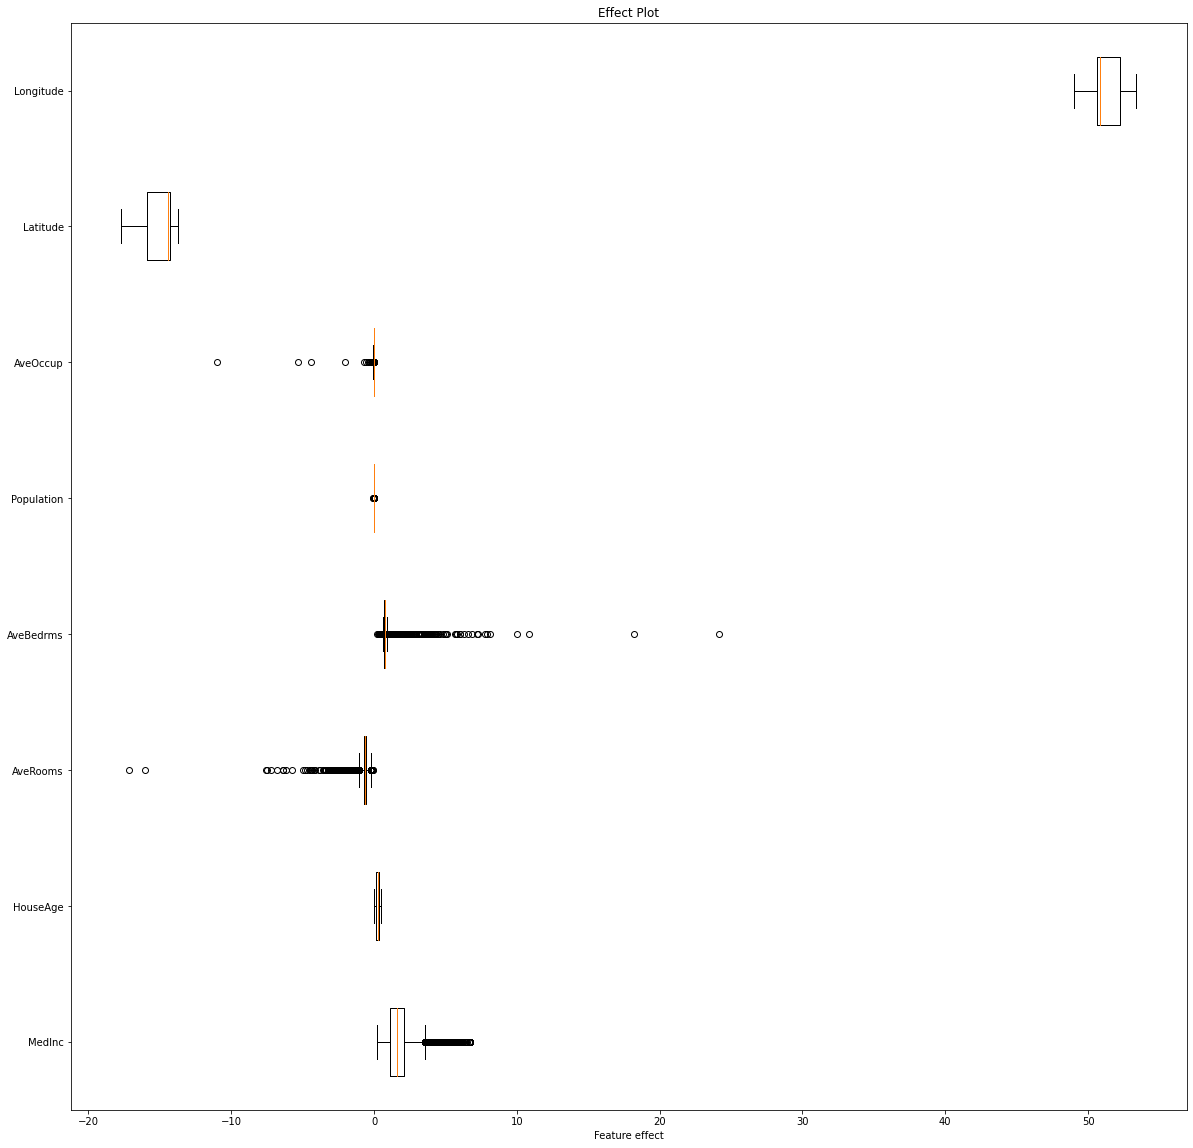

In [10]:
X_rev = ds_X.T
plt.figure(figsize=(20, 20))

feature_values = []
for i in range(coefficients.size):
  feature_values.append(X_rev[i] * coefficients[i])

plt.title("Effect Plot")
plt.boxplot(feature_values, vert=False)
plt.yticks(range(1, len(feature_names) + 1), feature_names)
plt.xlabel("Feature effect")

plt.show()

## **Effect plot 2(???)**

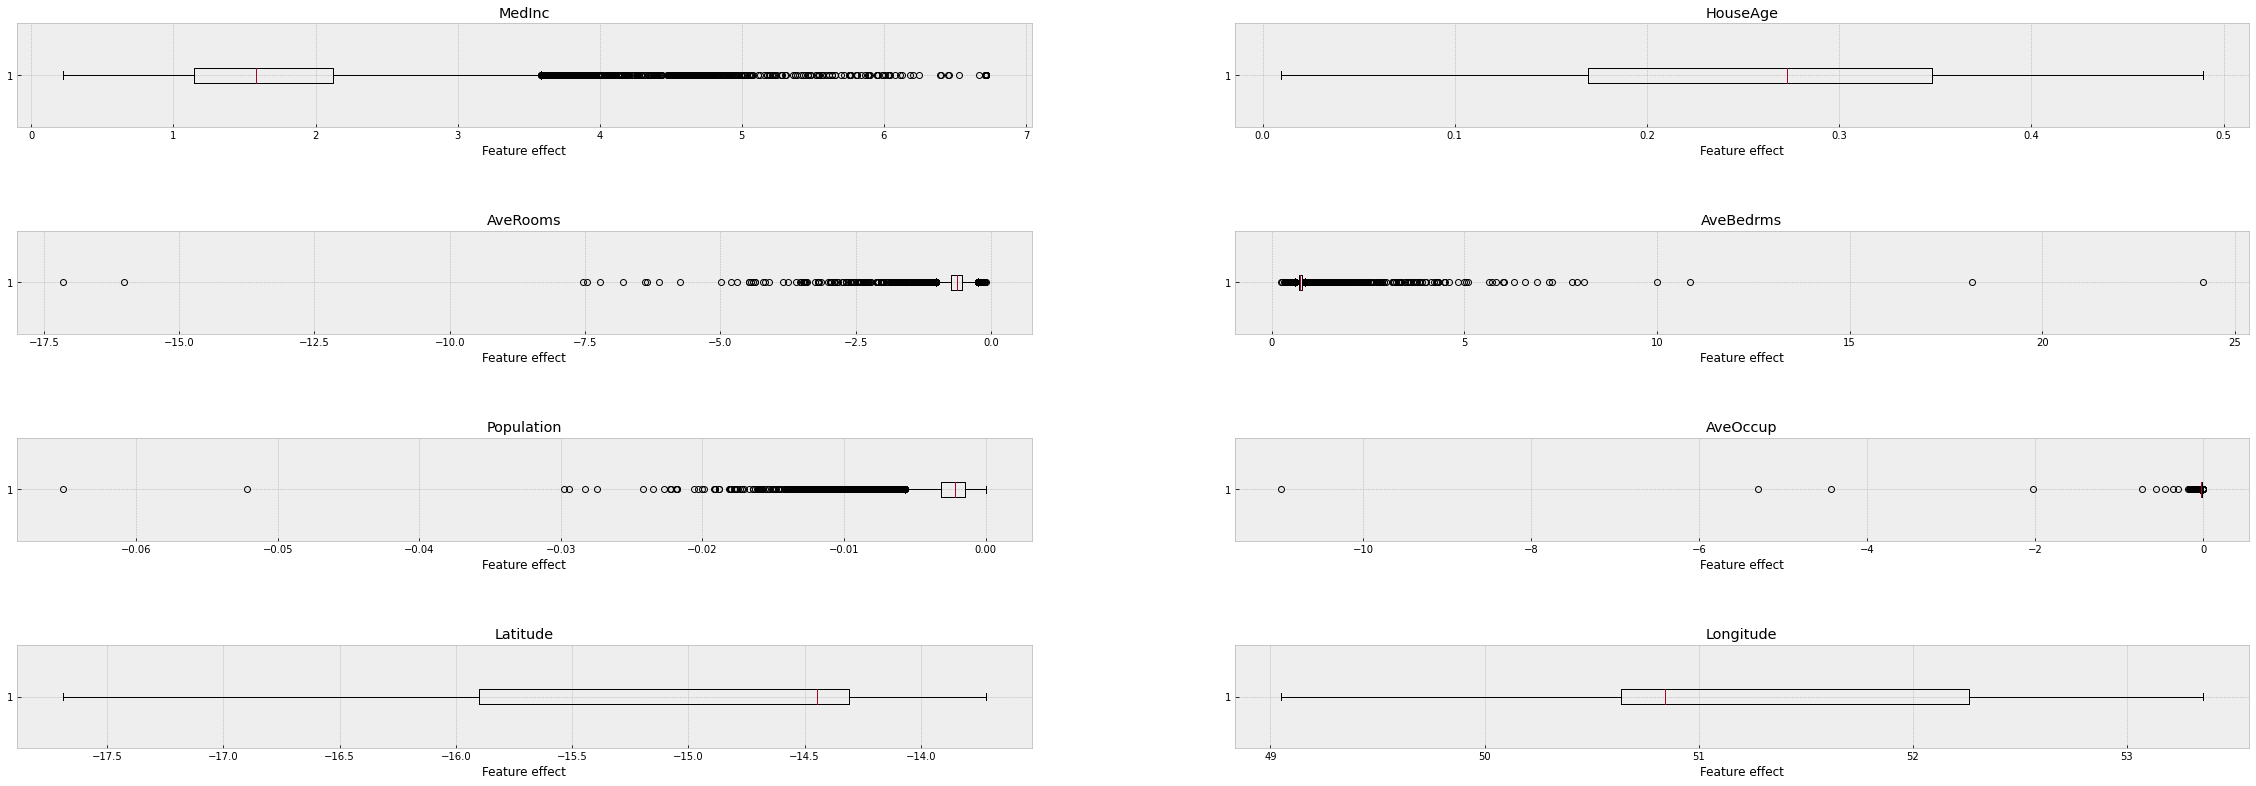

In [13]:
X_rev = ds_X.T
plt.figure(figsize=(40, 40))

for i in range(coefficients.size):

  plt.style.use('bmh')
  plt.subplot(11, 2, (i + 1))
  plt.title(feature_names[i])
  plt.boxplot((X_rev[i] * coefficients[i]), vert=False)
  plt.subplots_adjust(hspace=1)
  plt.xlabel("Feature effect")
  
plt.show()

# **Effect plot explained for a random sample**

To τυχαίο μας δείγμα είναι το **3,626ο** από τα 4000 του **ds_X_test** και το μοντέλο μας προβλέπει την τιμή **2.39** (δηλαδή $239,000)

Η τιμή αυτή είναι λίγο **μεγαλύτερη** από την **μέση τιμή** των προβλέψεων, για όλα τα δείγματα, που είναι **2.26**. 

Η **πραγματική τιμή** αυτού του δείγματος είναι **2.14**, δηλαδή **χαμηλότερη** από την τιμή της πρόβλεψης.



Random number is: 1000
Predicted value for instance: 2.83
Averange predicted value: 2.26
Actual value: 2.56


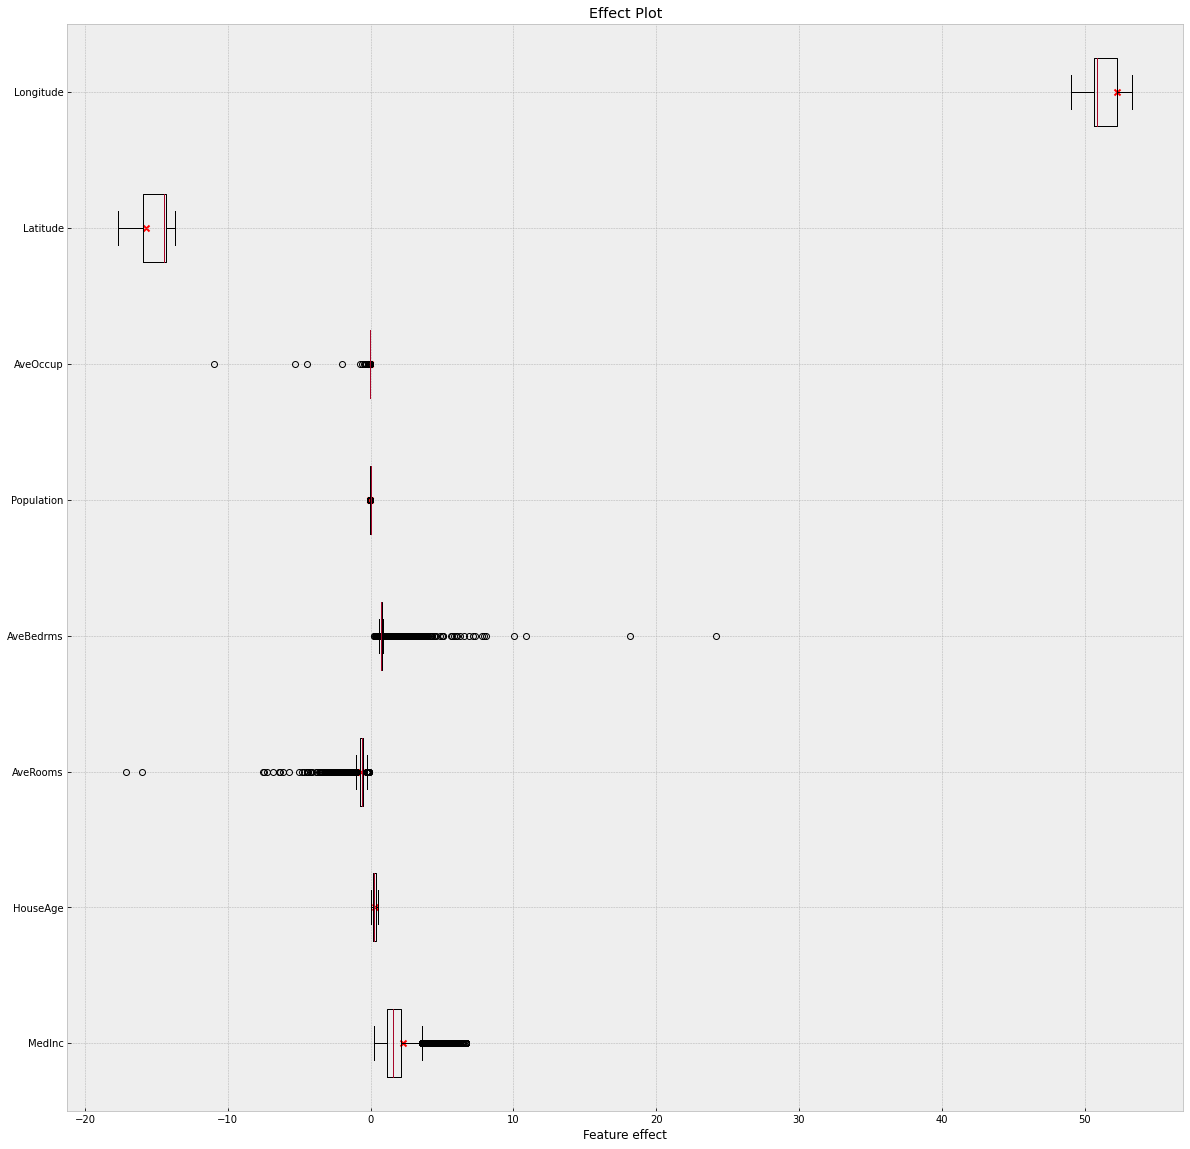

In [14]:
#Επιλέγουμε τυχαία ένα δείγμα
random_number = 1000
print("Random number is: %d" % random_number)
random_sample = ds_X_test[random_number]

plt.figure(figsize=(20, 20))

print("Predicted value for instance: %.2f" % ds_Y_pred[random_number])
print("Averange predicted value: %.2f" % ds_Y_pred.mean())
print("Actual value: %.2f" % ds_Y_test[random_number])

feature_values = []
for i in range(coefficients.size):
  feature_values.append(X_rev[i] * coefficients[i])

plt.title("Effect Plot")
plt.boxplot(feature_values, vert=False)
plt.yticks(range(1, len(feature_names) + 1), feature_names)

for i in range(coefficients.size):
  plt.scatter(x=(random_sample[i] * coefficients[i]), y=i+1, marker='x', color='red')
plt.xlabel("Feature effect")

plt.show()

Random number is: 1000
Predicted value for instance: 2.83
Averange predicted value: 2.26
Actual value: 2.56


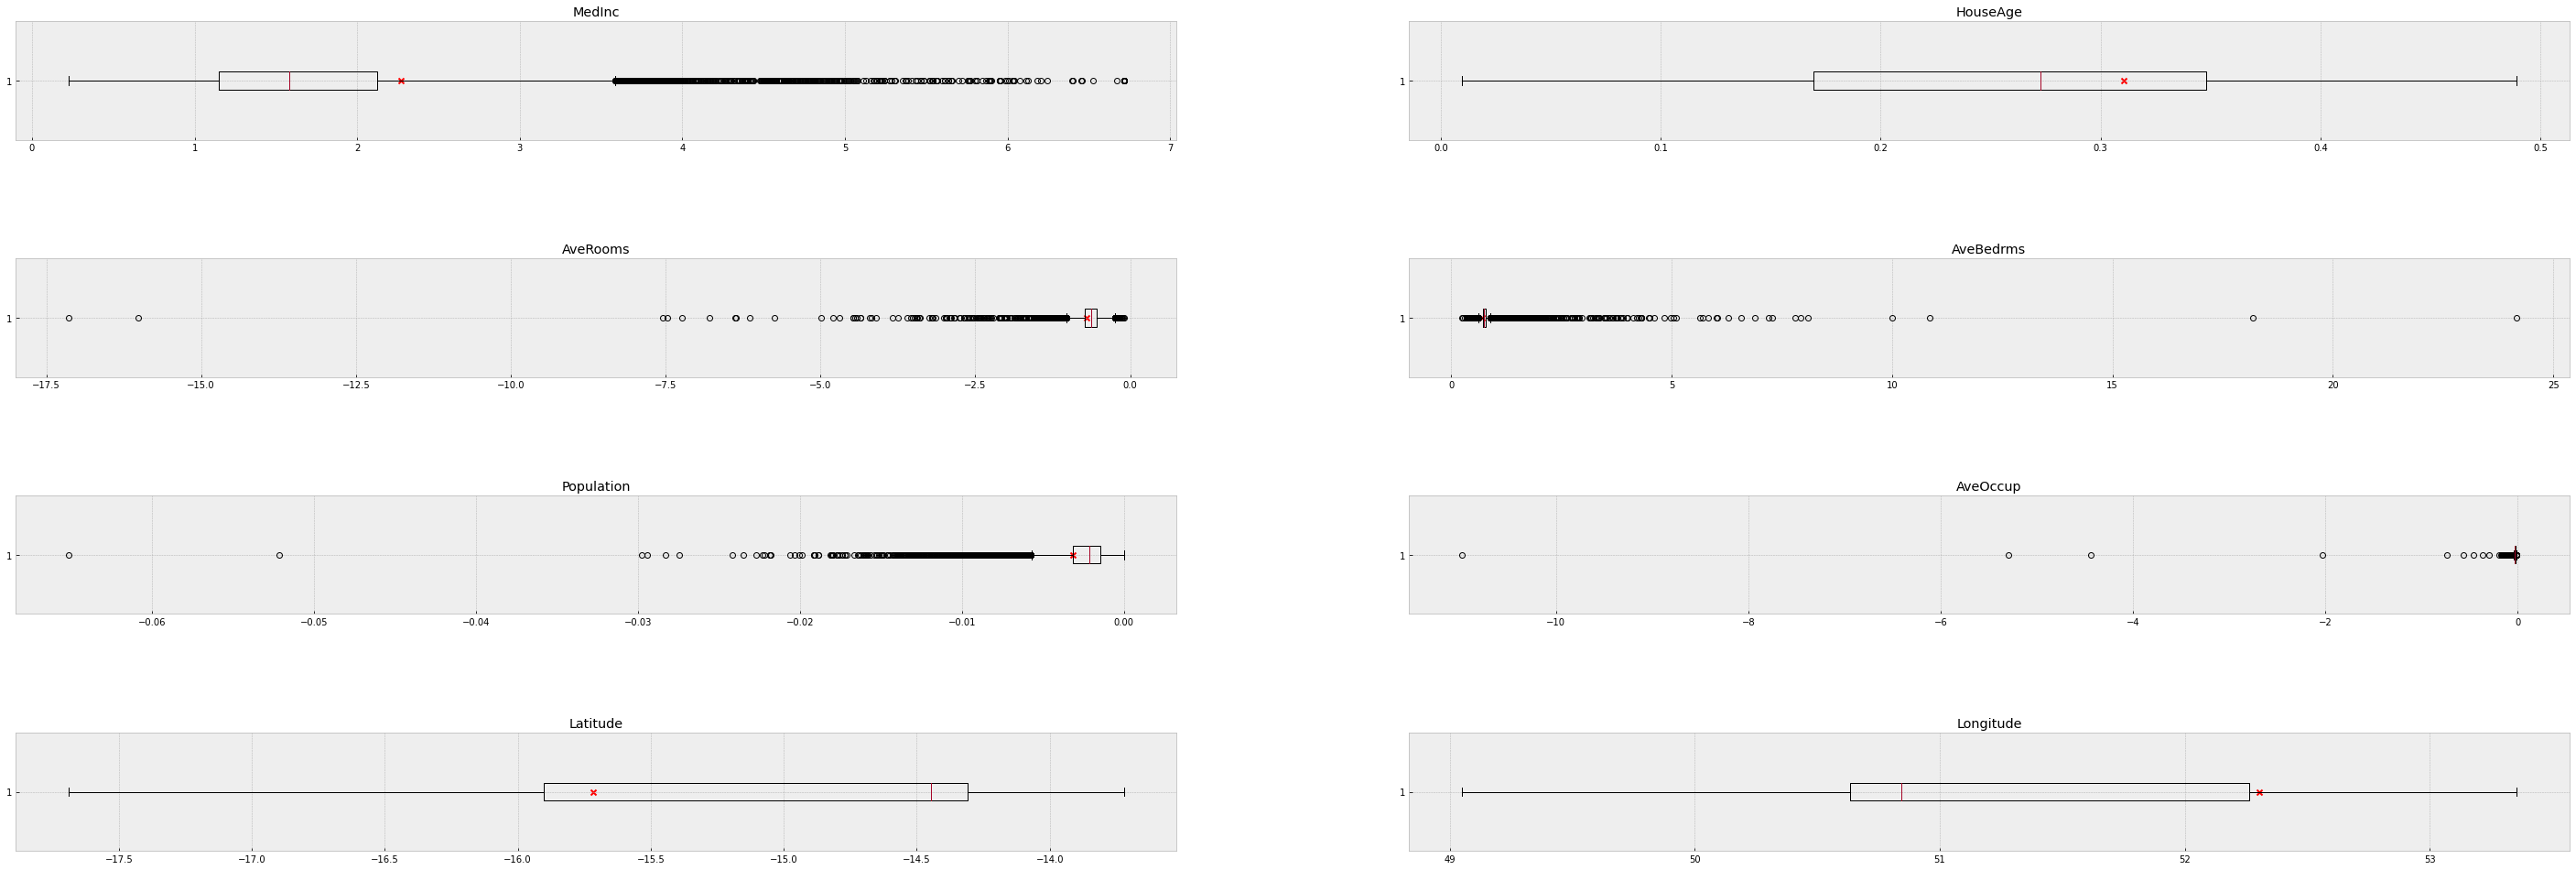

In [15]:
#Επιλέγουμε τυχαία ένα δείγμα
random_number = 1000   # Για να πάρουμε πάλι το ίδιο δείγμα που εξετάσαμε και παραπάνω.
print("Random number is: %d" % random_number)
random_sample = ds_X_test[random_number]

plt.figure(figsize=(50, 50))

print("Predicted value for instance: %.2f" % ds_Y_pred[random_number])
print("Averange predicted value: %.2f" % ds_Y_pred.mean())
print("Actual value: %.2f" % ds_Y_test[random_number])

for i in range(coefficients.size):
  plt.style.use('bmh')
  plt.subplot(11, 2, (i + 1))
  plt.title(feature_names[i])
  plt.boxplot((X_rev[i] * coefficients[i]), vert=False)
  plt.scatter(x=(random_sample[i] * coefficients[i]),y=1, marker='x', color='red')
  plt.subplots_adjust(hspace=1)
  
plt.show()

Plot target with each feature separately
Feature 0 (MedInc)


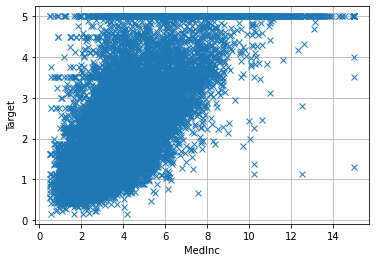

Feature 1 (HouseAge)


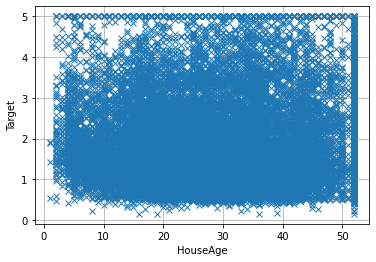

Feature 2 (AveRooms)


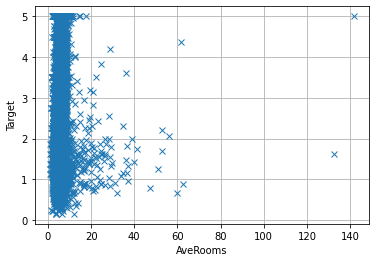

Feature 3 (AveBedrms)


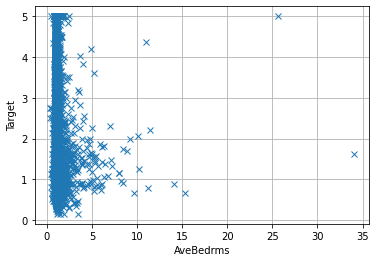

Feature 4 (Population)


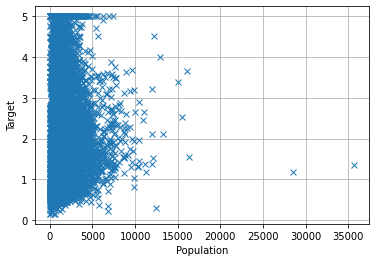

Feature 5 (AveOccup)


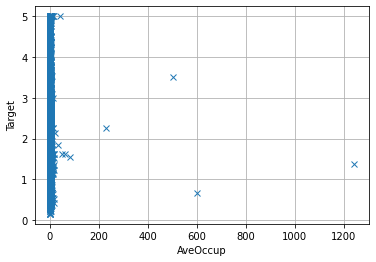

Feature 6 (Latitude)


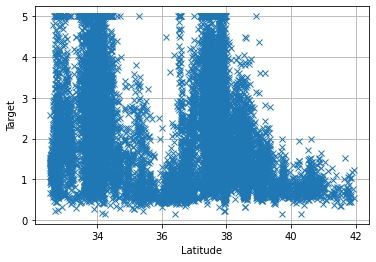

Feature 7 (Longitude)


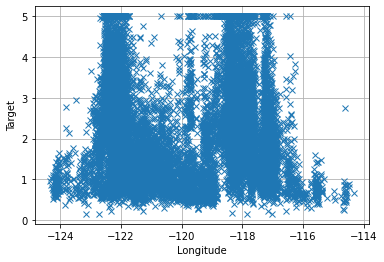

In [ ]:
print("Plot target with each feature separately")
for i in range(ds_X_train.data.shape[1]):
    print("Feature %d (%s)" % (i, feature_names[i]))
    plt.plot(data[:, i], target[:], 'x')
    plt.xlabel(feature_names[i])
    plt.ylabel("Target")
    plt.grid()
    plt.show()